# Unsupervised learning

## Context

The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.

## Objective

Apply dimensionality reduction technique – PCA and train a model using
principle components instead of training the model using just the raw data.

## Attribute Information

 -  All the features are geometric features extracted from the silhouette.
 -  All are numeric in nature.

### Importing Libraries

In [95]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

#####  Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm.

In [96]:
# Loading dataset
df = pd.read_csv('vehicle.csv')

In [97]:
#Viewing the data
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

Here we can see "class" column as dependent Variable and all other columns as "Independent" columns

In [98]:
#checking attributes
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [99]:
#checking dimensions
df.shape

(846, 19)

In [100]:
#checking datatypes
pd.DataFrame(df.dtypes, columns = ['Datatypes'])

Datatypes
compactness                     int64
circularity                   float64
distance_circularity          float64
radius_ratio                  float64
pr.axis_aspect_ratio          float64
max.length_aspect_ratio         int64
scatter_ratio                 float64
elongatedness                 float64
pr.axis_rectangularity        float64
max.length_rectangularity       int64
scaled_variance               float64
scaled_variance.1             float64
scaled_radius_of_gyration     float64
scaled_radius_of_gyration.1   float64
skewness_about                float64
skewness_about.1              float64
skewness_about.2              float64
hollows_ratio                   int64
class                          object

In [101]:
#Statistic Summary
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [102]:
#checking unique values
df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [103]:
#checking overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [104]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in dataset

In [105]:
#checking NULL values
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are missing values in dataset. Later we will treat it

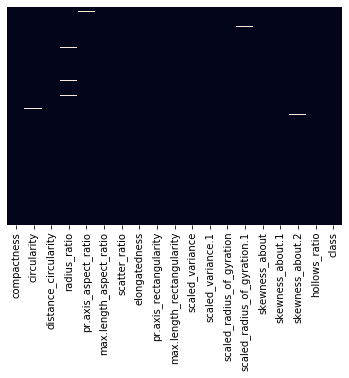

In [106]:
sns.heatmap(df.isnull(),yticklabels=False,cbar= False);

We can see missing values in heatmap also, white dashed lines shows presence of missing values

In [107]:
# medianFiller = lambda x : x.fillna(x.median())
# df = df.apply(medianFiller,axis=0)
#Treating missing values and filling it with median of that particular column
df1 = df.copy(deep=True)

df1['circularity']= df1['circularity'].fillna(df1['circularity'].median())
df1['distance_circularity']= df1['distance_circularity'].fillna(df1['distance_circularity'].median())
df1['radius_ratio']= df1['radius_ratio'].fillna(df1['radius_ratio'].median())
df1['pr.axis_aspect_ratio']= df1['pr.axis_aspect_ratio'].fillna(df1['pr.axis_aspect_ratio'].median())
df1['scatter_ratio']= df1['scatter_ratio'].fillna(df1['scatter_ratio'].median())
df1['elongatedness']= df1['elongatedness'].fillna(df1['elongatedness'].median())
df1['pr.axis_rectangularity']= df1['pr.axis_rectangularity'].fillna(df1['pr.axis_rectangularity'].median())
df1['scaled_variance']= df1['scaled_variance'].fillna(df1['scaled_variance'].median())
df1['scaled_variance.1']= df1['scaled_variance.1'].fillna(df1['scaled_variance.1'].median())
df1['scaled_radius_of_gyration']= df1['scaled_radius_of_gyration'].fillna(df1['scaled_radius_of_gyration'].median())
df1['scaled_radius_of_gyration.1']= df1['scaled_radius_of_gyration.1'].fillna(df1['scaled_radius_of_gyration.1'].median())
df1['hollows_ratio']= df1['hollows_ratio'].fillna(df1['hollows_ratio'].median())
df1['skewness_about']= df1['skewness_about'].fillna(df1['skewness_about'].median())
df1['skewness_about.1']= df1['skewness_about.1'].fillna(df1['skewness_about.1'].median())
df1['skewness_about.2']= df1['skewness_about.2'].fillna(df1['skewness_about.2'].median())


In [108]:
#Replacing value of class column
df1['class'] = df['class'].map({'van' : 1,'car': 2, 'bus' : 3})
df1['class'].value_counts()

2    429
3    218
1    199
Name: class, dtype: int64

In [109]:
#Again check if we have any values in dataset
df1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

All are zero, it means there are no missing values now

In [110]:
# #Renaming Column values for clear understanding
df1 = df1.rename({"pr.axis_aspect_ratio" : "pr_axis_aspect_ratio",
                    "max.length_aspect_ratio" : "max_length_aspect_ratio",
                    "pr.axis_rectangularity" : "pr_axis_rectangularity", 
                    "max.length_rectangularity" :"max_length_rectangularity",
                   "scaled_variance.1" : "scaled_variance_1",
                    "scaled_radius_of_gyration.1" : "scaled_radius_of_gyration_1" ,
                    "skewness_about.1" : "skewness_about_1",
                    "skewness_about.2" : "skewness_about_2" }
                    , axis = 'columns'
                  )

##### Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why.

Univariate Analysis

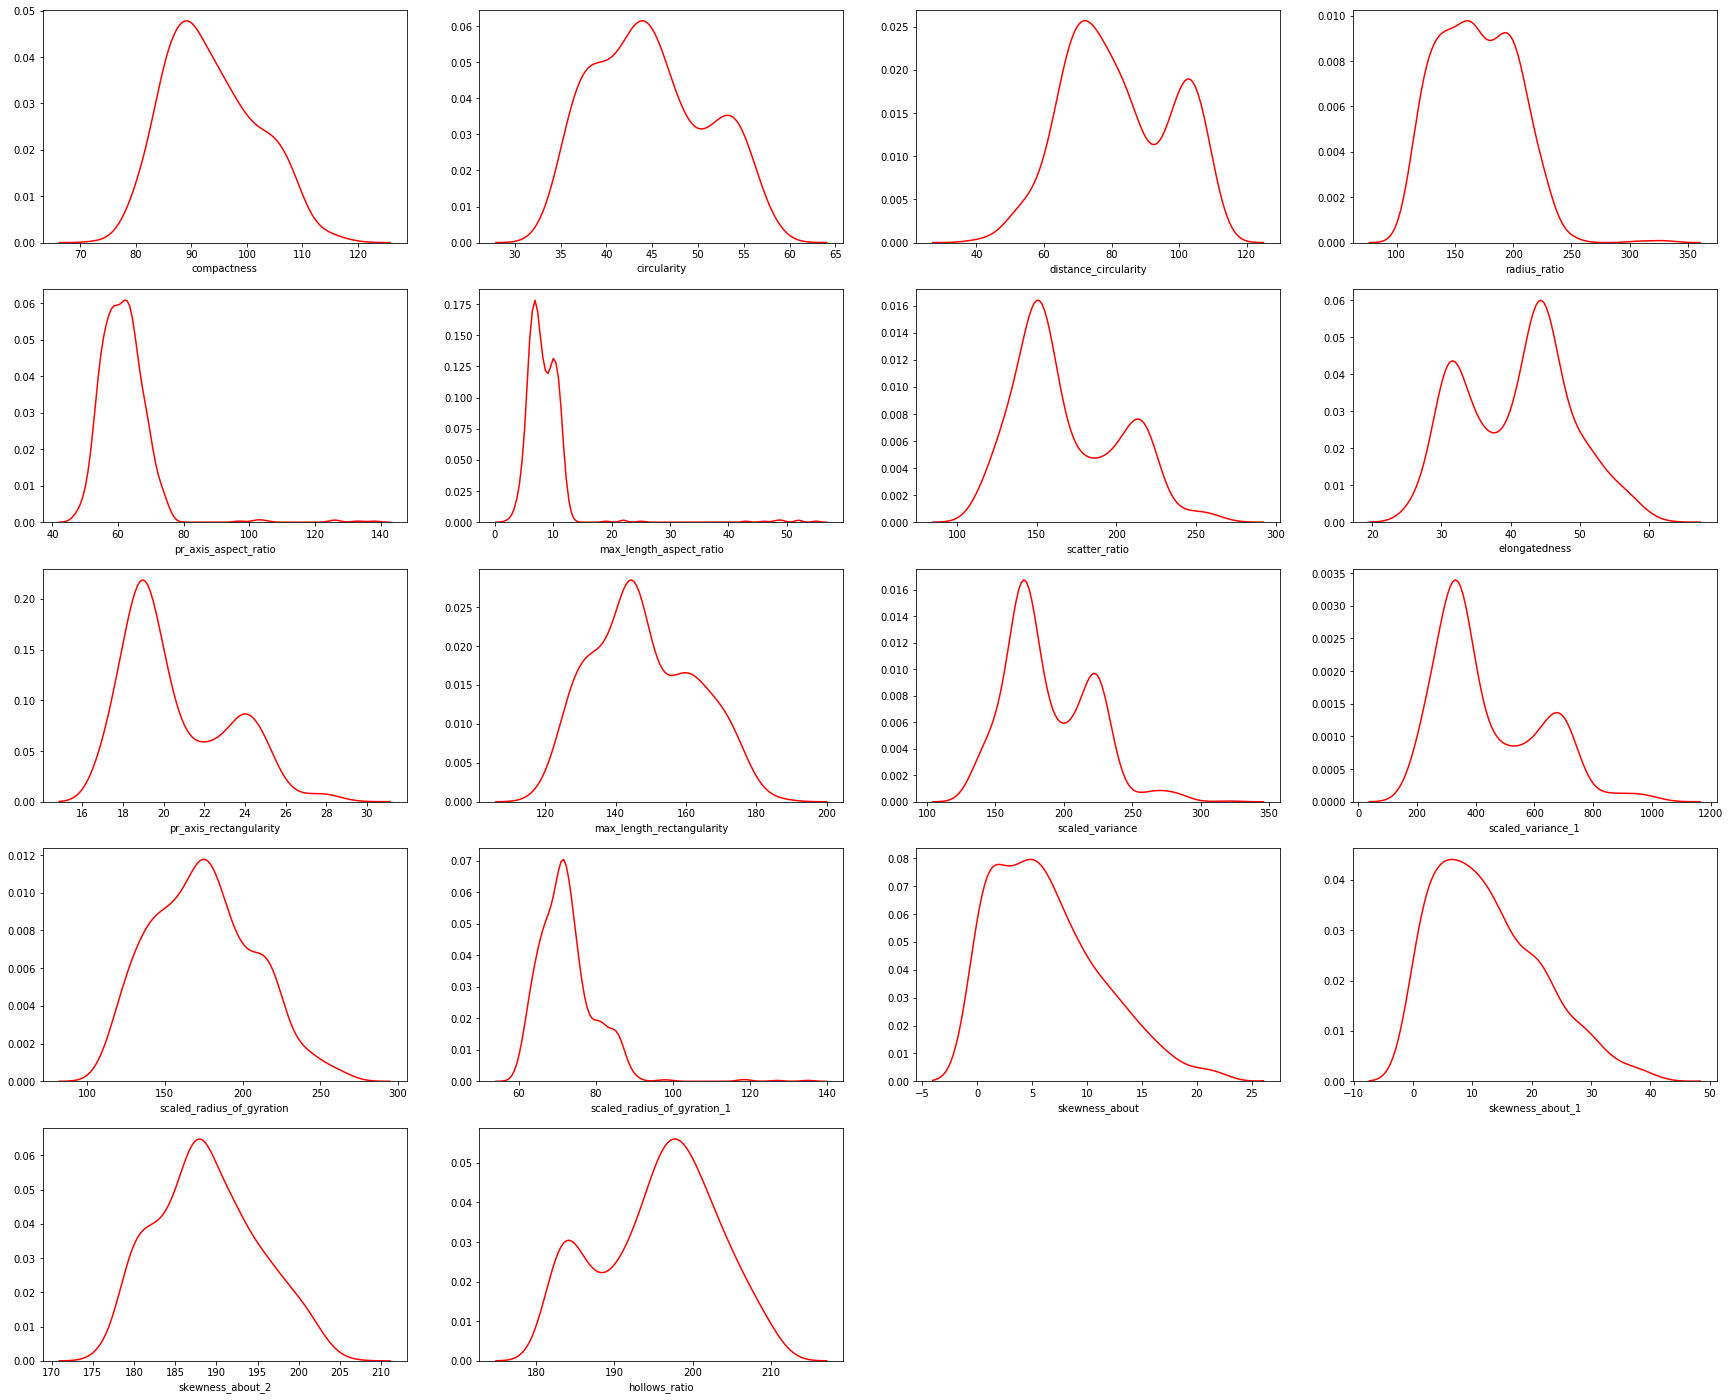

In [111]:
Cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio']
pos = 1

plt.figure(figsize=(30,30))

for i in Cols:
    plt.subplot(6,4,pos)
    sns.distplot(df1[i], hist=False, color='red')
    pos+=1

Here we can see above columns are following Normal distribution (bit squeezed) and also bi-modal distribution.

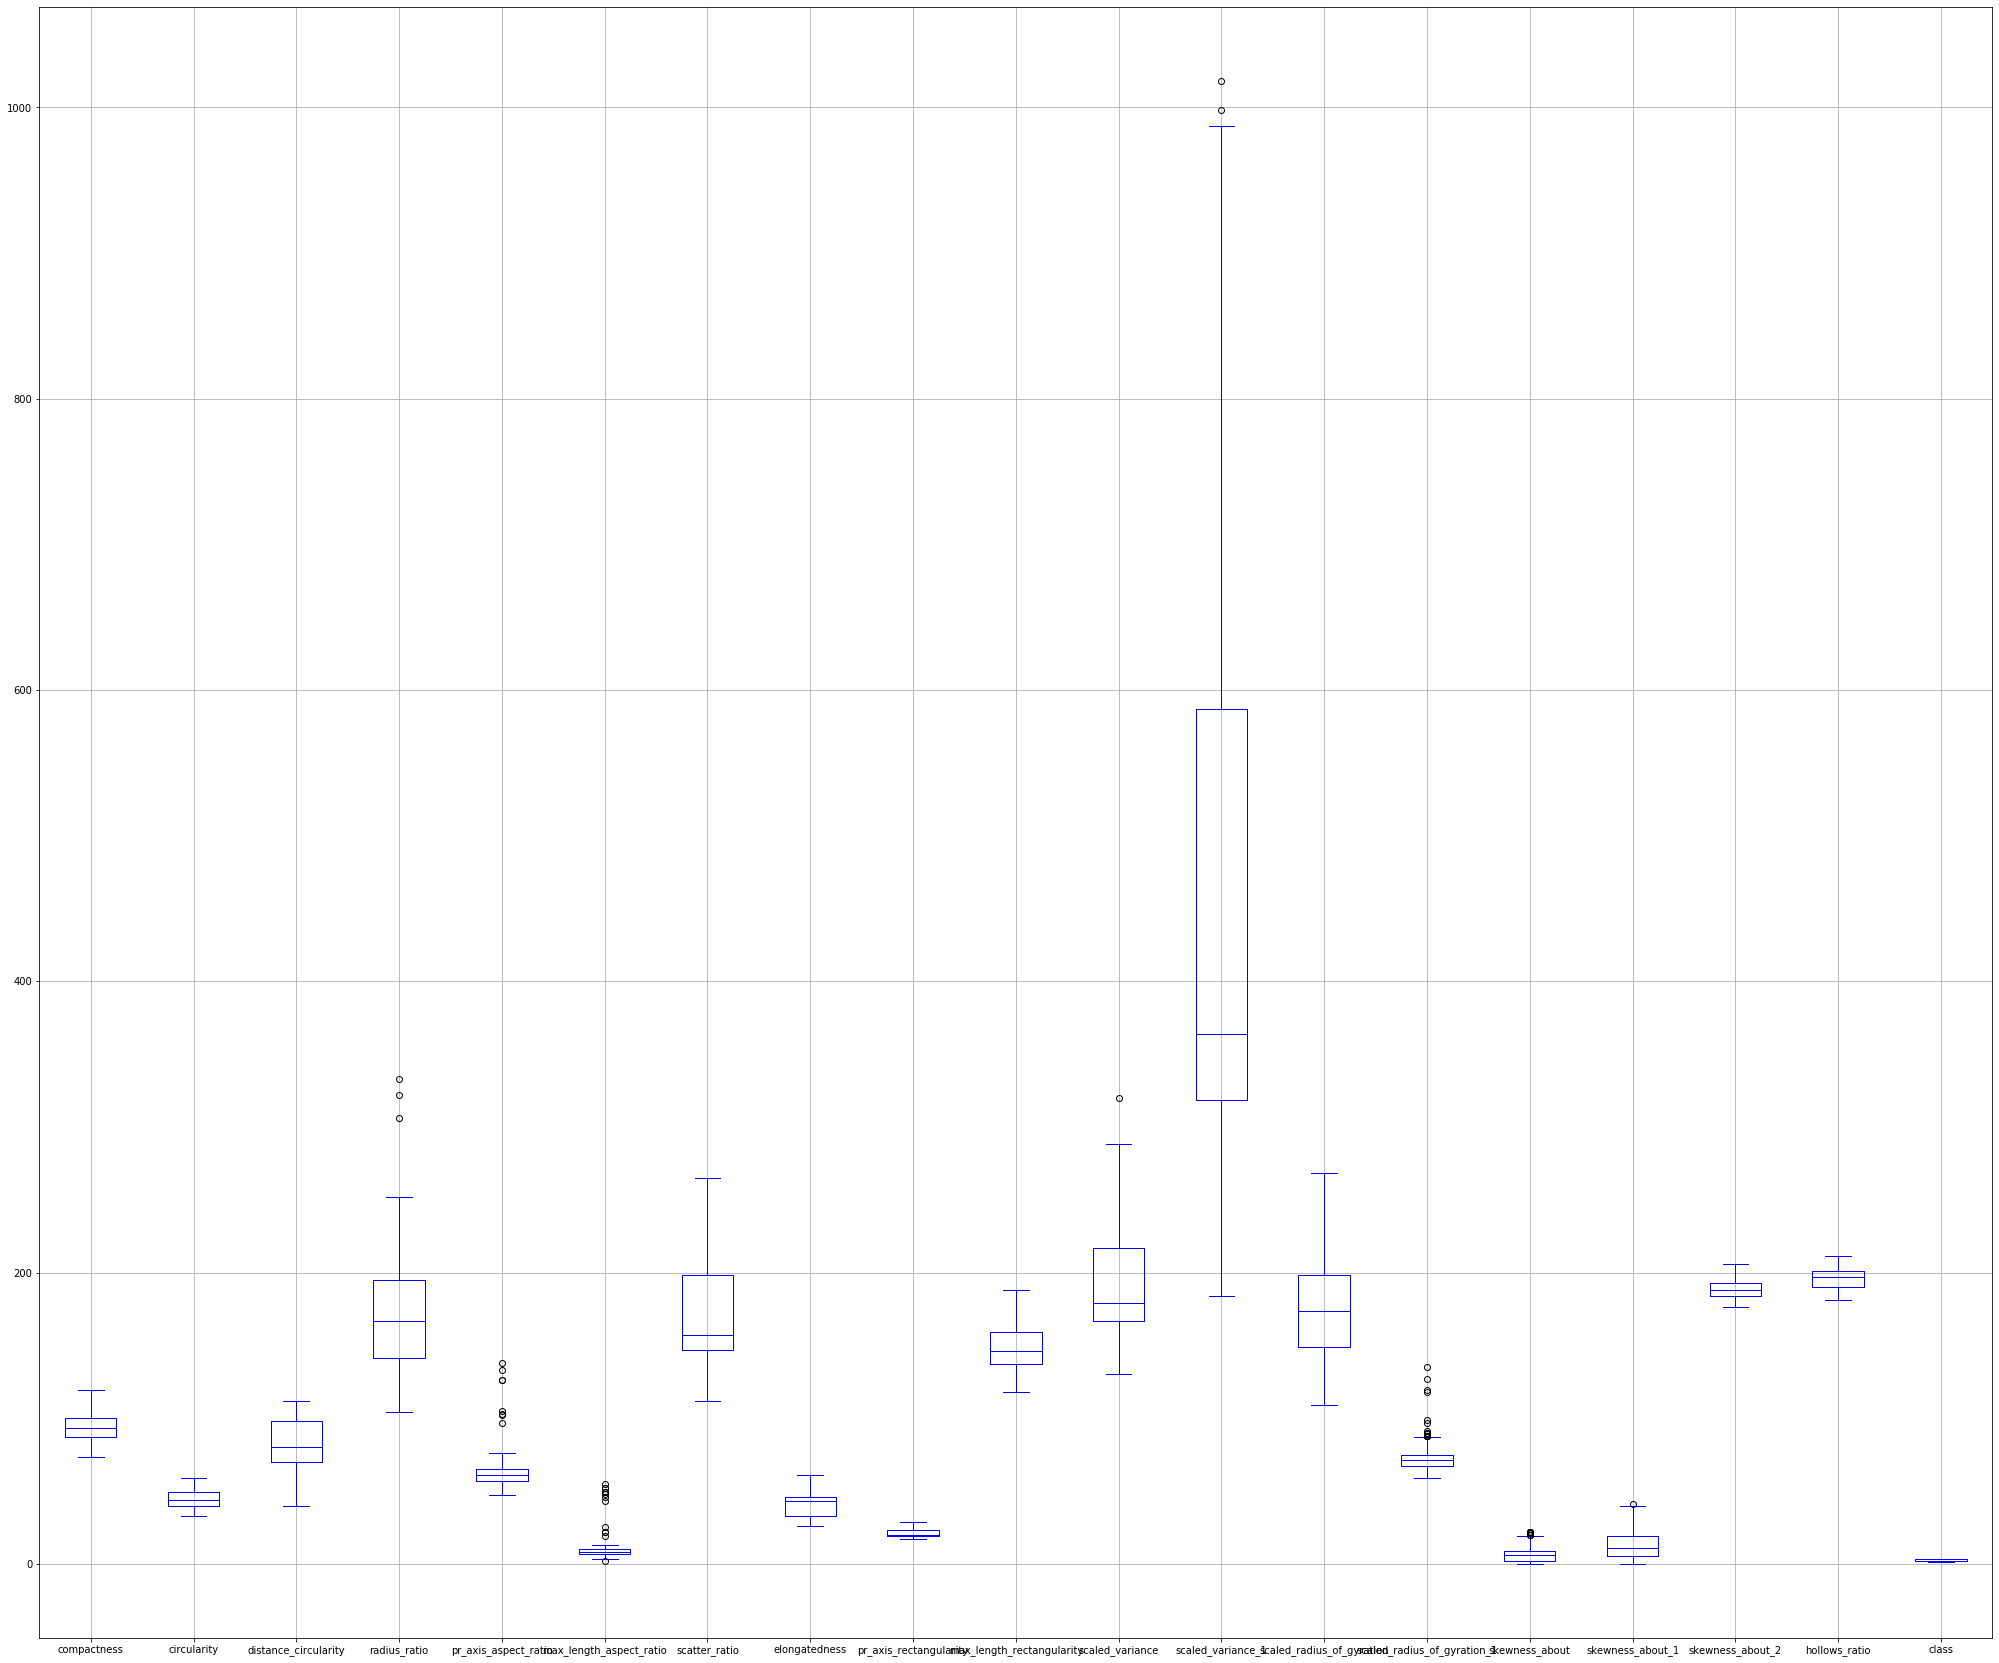

In [112]:
df1.boxplot(figsize=(35,30), color= 'blue');

Here we can see presence of outliers in many columns.

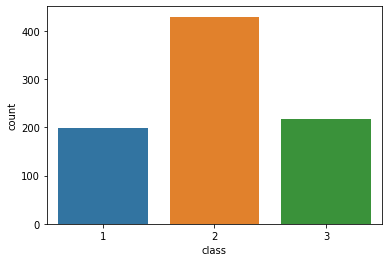

In [113]:
sns.countplot(df1['class'])

In [114]:
df1['class'].value_counts()

2    429
3    218
1    199
Name: class, dtype: int64

We can see,dependent columns "class", highest vehicle type were of class-2 i.e car type. 

### Multivaraiate Analysis

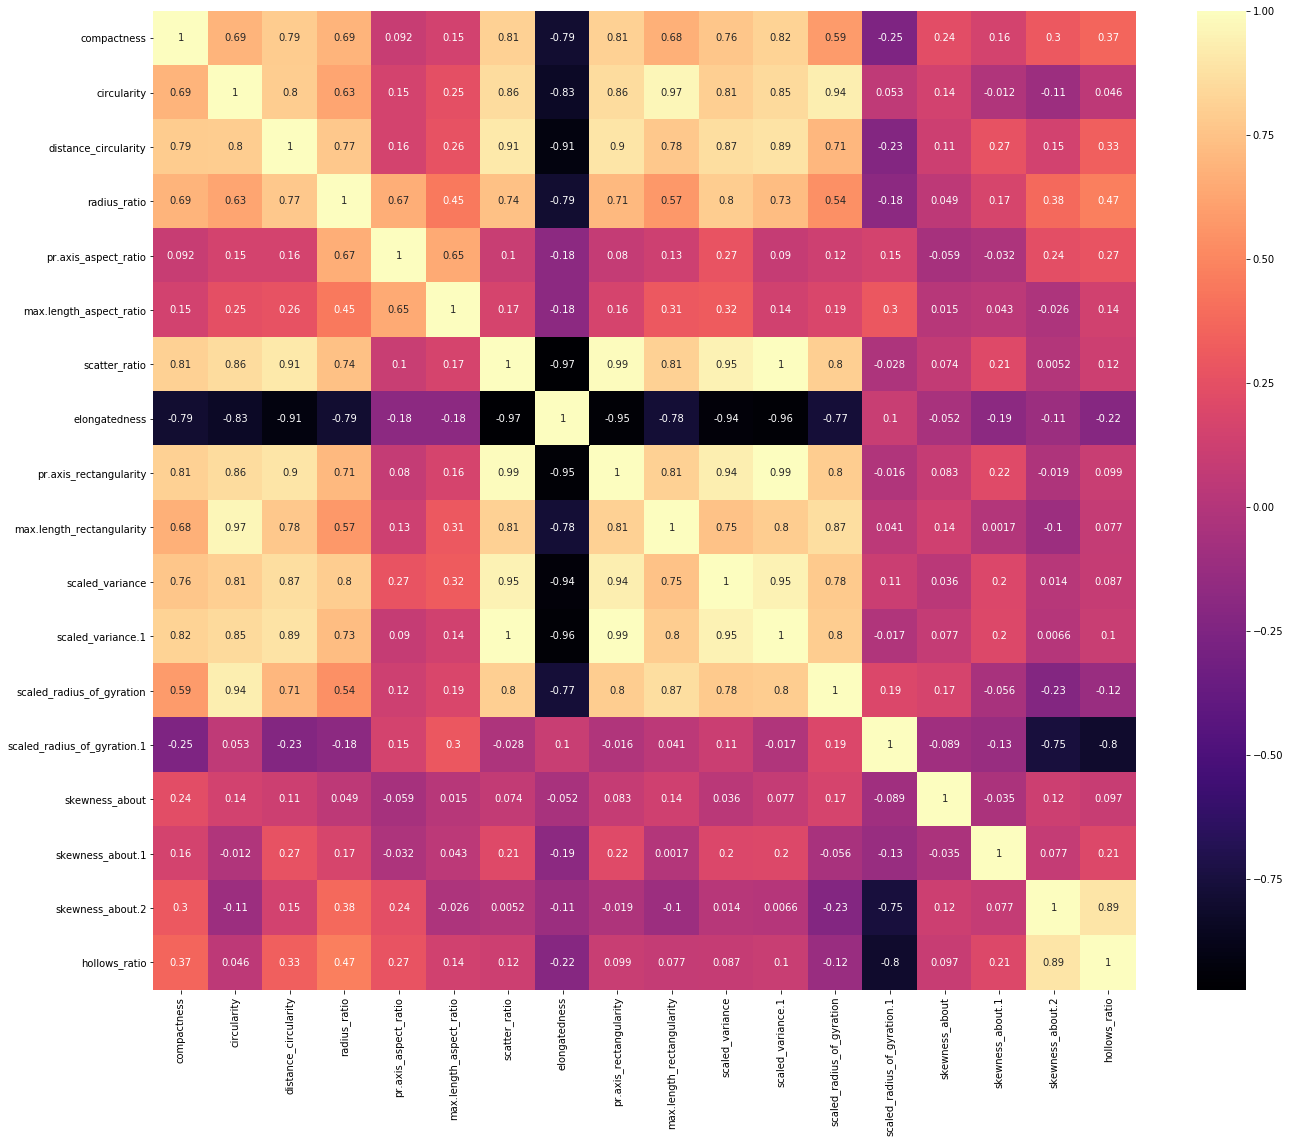

In [115]:
# corr = df1.corr()
# corr.style.background_gradient(cmap='YlGnBu')

cor = df.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap = 'magma');


- Quiet evidently, few dependant variables are correlated heavily amongst themselves example, 'scatter_ratio' and 'scaled_variance.1'  have a 100% correlation
- For now instead of dropping any variables, we will carry on with the exercise and see how we can use PCA to deal with this

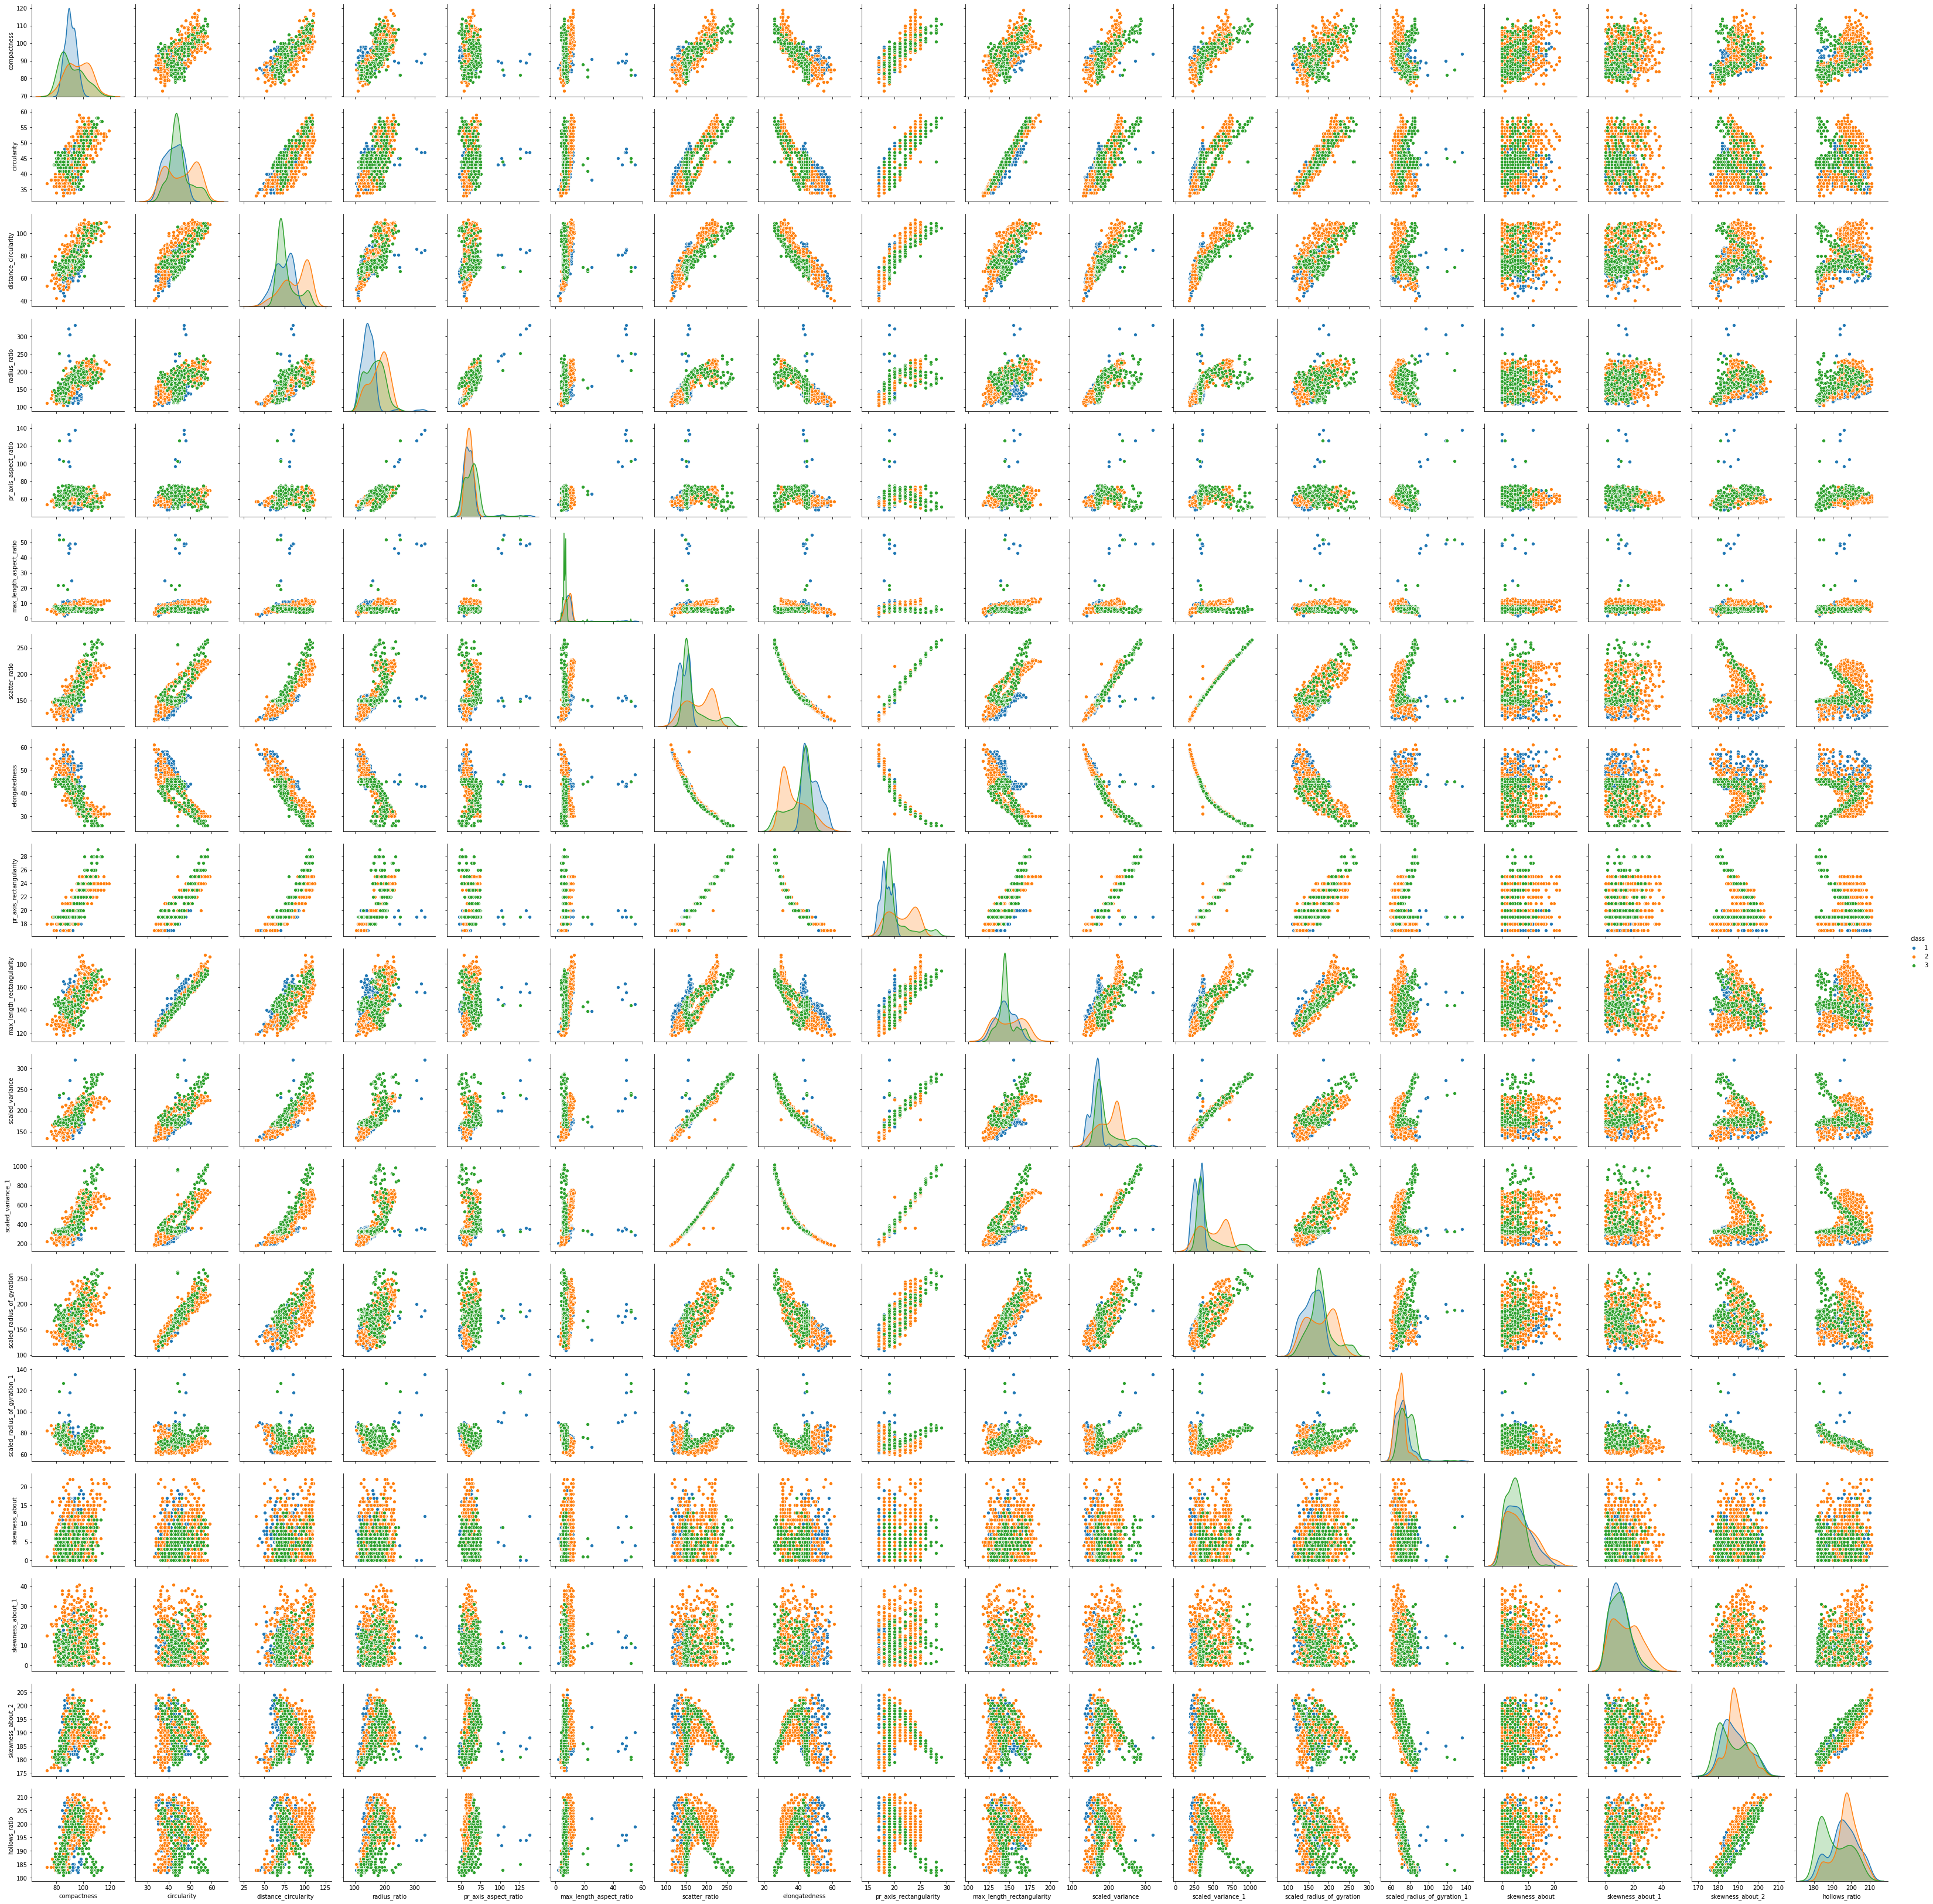

In [116]:
sns.pairplot(df1,diag_kind='kde', hue = 'class')

In above pairplot, we can see how correlated three types of classes : van, car and bus are.

##### Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn).

Note: All the variables are not on the same scale hence before visualizing all of them together using box plots, we will scale the data.

Because we are using a supervised model in the end, we want to avoid any potential data leakage. Hence, we will be scaling the data seperately for test and train. Similarly we will generate Principle components only from the train data and later transform the test data


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Independent variables or Predictor Features  
X = df1.drop(['class'],axis =1)
#Dependent variable or Predicted class
y = df1['class']

scaler = StandardScaler()

#Split data in training and test set in the ratio of 70:30, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=5)

scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

'''Because .transform returns nd arrays, assigning them back to the respective dataframes to retain dataframe structure,
but with scaled values'''

X_train.loc[:,:] = X_train_std
X_test.loc[:,:] = X_test_std

X_train_std.shape, X_test_std.shape

((592, 18), (254, 18))

Here, training and test data is splitted in the ratio of 70:30.

#####  Train a Support vector machine using the train set and get the accuracy on the test set.

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix

svm = SVC(gamma ='auto')
svm.fit(X_train_std,y_train)
print('SVC Accuracy on Test is :', svm.score(X_test_std,y_test))
print(f'Number of dimensions used to train the model: {X_train.shape[1]}')

SVC Accuracy on Test is : 0.937007874015748
Number of dimensions used to train the model: 18


In above SVM model, it is giving 93% accuracy on test data.

In [119]:
from sklearn.model_selection import GridSearchCV
model = SVC()

params = {'C': [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10], 'kernel': ['linear', 'rbf'], 'gamma' : ['auto', 'scale' ]}

model1 = GridSearchCV(model, param_grid=params, cv = 10, iid = False)

model1.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{model1.best_params_}")

Best Hyper Parameters:

{'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}


In [120]:
svm = SVC(C = 8, gamma = 'auto', kernel = 'rbf')

svm.fit(X_train_std,y_train)
print('SVC Accuracy on Test is :', svm.score(X_test_std,y_test))
print(f'Number of dimensions used to train the model: {X_train.shape[1]}')

SVC Accuracy on Test is : 0.9645669291338582
Number of dimensions used to train the model: 18


#####  Perform K-fold cross validation and get the cross validation score of the model (optional)


In [121]:
#Kfold for SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 5

kfold = KFold(n_splits=num_folds,random_state=seed)
# model = SVC()
model = SVC(C=.1, kernel= 'linear',gamma=1)
results = cross_val_score(model,X,y,cv=kfold)
print('Different folds :',results)
print("Kfold SVC Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Different folds : [0.91764706 0.94117647 0.98823529 0.97647059 0.95294118 0.92941176
 0.97619048 0.97619048 0.95238095 0.97619048]
Kfold SVC Accuracy: 95.868% (2.243%)


In above Kfold model,dataset is divided into 10 folds and giving accuracy of 95% on test data.

#####  Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data 

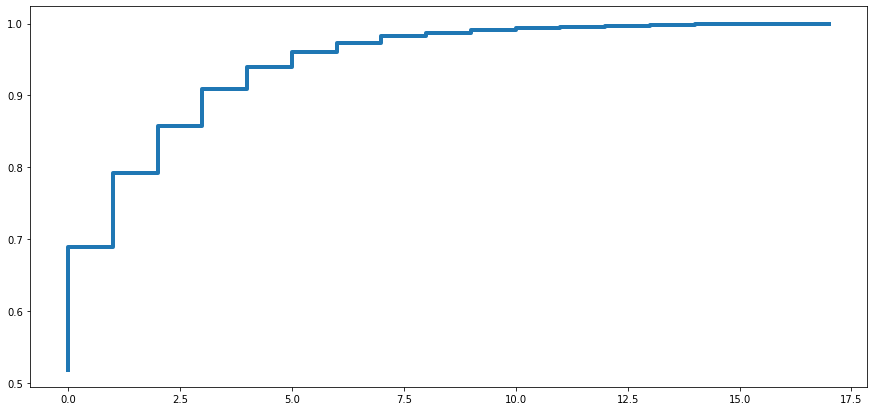

[0.51884576 0.68950976 0.79181046 0.85759818 0.90856123 0.93897816
 0.9602014  0.97313221 0.98235749 0.98740696 0.99093224 0.9935185
 0.99559306 0.99705835 0.99815624 0.99913433 0.99977851 1.        ]


In [122]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_std)

cummulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize= (15,7))
plt.step(x = list(range(18)), y=cummulative_variance, linewidth = 4)
plt.show()
print(cummulative_variance)

Looks like we need 9 principle components if we were to lose at most, 2% of the information in the data

In [123]:
pca = PCA(.98)  # PCA object, which when fitted will generate principle components such that they capture 98% of the variance 

pca = pca.fit(X_train_std)

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [124]:
print(f'''Total number of dimensions in the dataset: {X_train_std.shape[1]}\n
Number of dimensions after PCA: {X_train_pca.shape[1]}\n
Dimensions reduced by {100*X_train_pca.shape[1]/X_train_std.shape[1]}%''')


Total number of dimensions in the dataset: 18

Number of dimensions after PCA: 9

Dimensions reduced by 50.0%


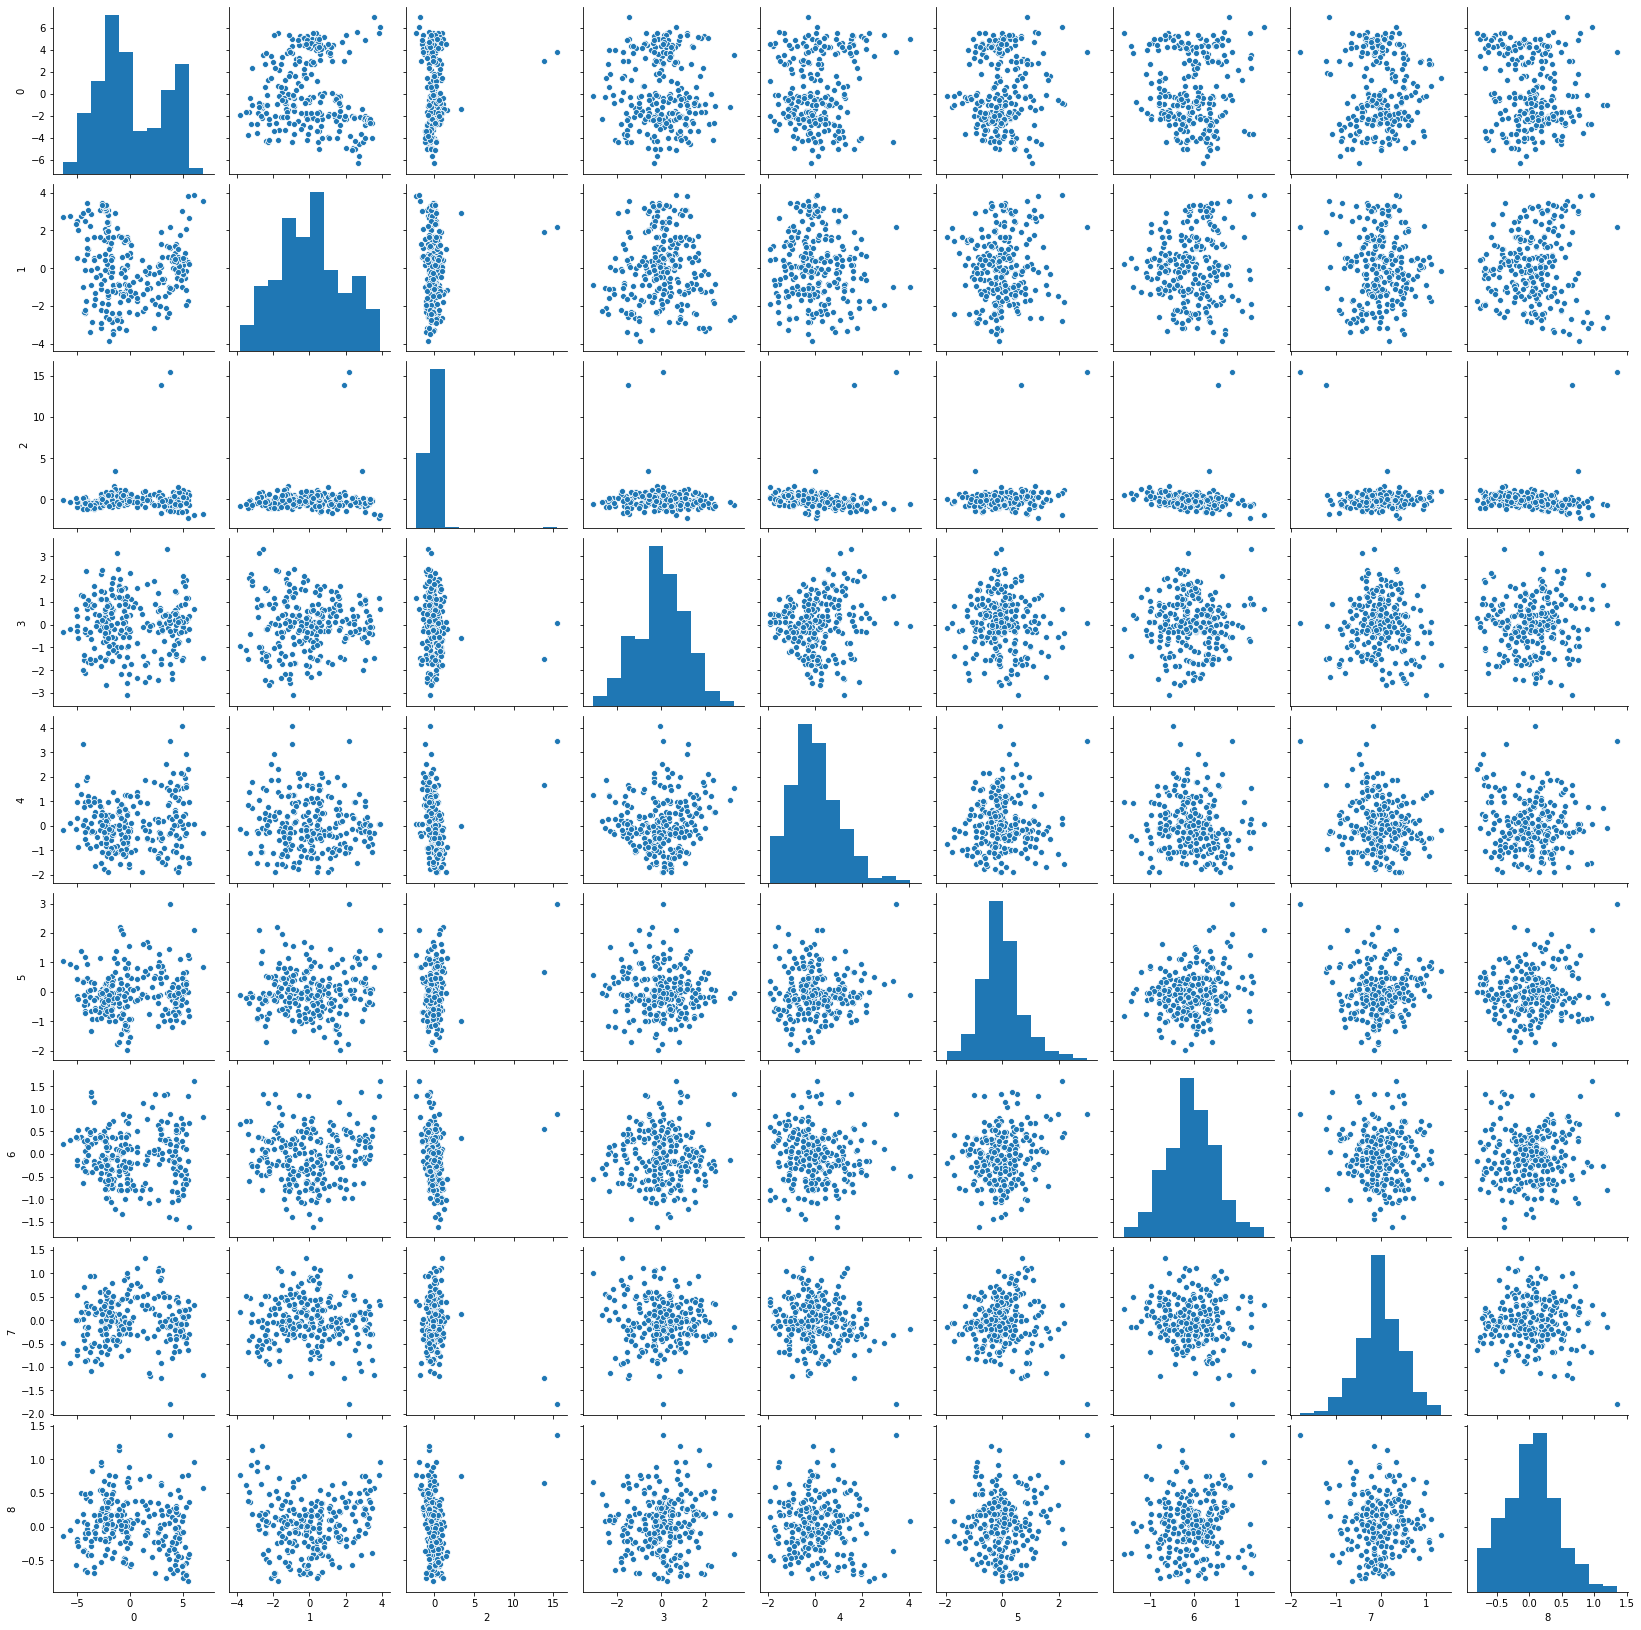

In [81]:
sns.pairplot(pd.DataFrame(X_test_pca));

We can see lot of information by plotting pairplot of 9 dimensions.

##### Now repeating steps 3,4 and 5 but this time, using Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.

In [125]:
# Training an SVC using the principal components instead of the actual attributes 

svm_pca= SVC(C = 8, gamma = 'auto', kernel = 'rbf')

svm_pca.fit(X_train_pca,y_train)
print('SVC Accuracy on Test is :', svm_pca.score(X_test_pca,y_test))
print(f'Number of dimensions used to train the model: {X_test_pca.shape[1]}')

SVC Accuracy on Test is : 0.9330708661417323
Number of dimensions used to train the model: 9


In [126]:
model_pca = SVC()

params = {'C': [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10], 'kernel': ['linear', 'rbf'], 'gamma' : ['auto', 'scale' ]}

model2 = GridSearchCV(model_pca, param_grid=params, cv = 10, iid = False)

model2.fit(X_train_pca, y_train)

print("Best Hyper Parameters:\n", model2.best_params_)

Best Hyper Parameters:
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [127]:
svm_pca_final = SVC(C = 10, gamma = 'scale', kernel = 'rbf')

svm_pca_final.fit(X_train_pca,y_train)
print('SVC Accuracy on Test is :', svm_pca_final.score(X_test_pca,y_test))
print(f'Number of dimensions used to train the model: {X_test_pca.shape[1]}')

SVC Accuracy on Test is : 0.952755905511811
Number of dimensions used to train the model: 9


So after PCA, for SVC model, accruracy on test is 95% on 9 components.

#####  Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings 

In [128]:
print('SVC Accuracy score (Raw data)on 18 columns         :',svm.score(X_test_std,y_test))
print('SVC Accuracy score (PCA)on 9 components              :',svm_pca_final.score(X_test_pca,y_test))

SVC Accuracy score (Raw data)on 18 columns         : 0.9645669291338582
SVC Accuracy score (PCA)on 9 components              : 0.952755905511811


In the given dataset we have trained SVM model on both original and dimensionally reduced dataset.
After reducing dimensions from 18 to 9. 
Test accuracy of SVM model is very good i.e 95%.

We got almost the same perfromance from SVC when we used all the attributes from the data as it is, and when we derived 9 principle components from the 18 attributes, reducing our feature space by 50%.

We can clearly see how PCA can help us in achieving great accuracy on reduced dimensions.
If we have to choose between these two then we can go for SVM model which is giving 95% accuracy on test data.